In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('/home/anu/Downloads/mnist_train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
l=df['label']
l

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [6]:
#calculate 

df=df.drop('label',axis=1)
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
print(df.shape)
print(l.shape)

(42000, 784)
(42000,)


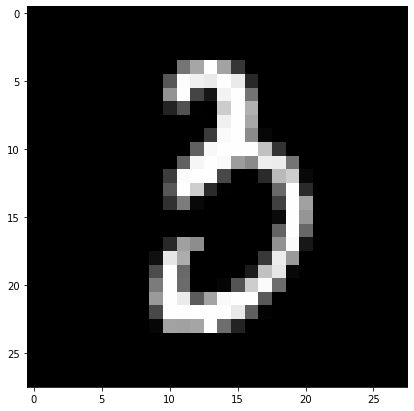

In [10]:
plt.figure(figsize=(7,7))
idx=150
#idx =100 gives number 9, 150 gives 3

grid_data=df.iloc[idx].to_numpy().reshape(28,28)
plt.imshow(grid_data,interpolation='none',cmap="gray")
plt.show()

In [11]:
labels=l.head(15000)
data=df.head(15000)
print('The shape of sample data=',data.shape)

The shape of sample data= (15000, 784)


In [12]:
from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler().fit_transform(data)
print(standardized_data.shape)
sample_data=standardized_data

(15000, 784)


In [13]:
from sklearn import decomposition
pca=decomposition.PCA()

In [14]:
pca.n_components=2
pca_data=pca.fit_transform(sample_data)

print("Shape of pca_reduced=",pca_data.shape)

Shape of pca_reduced= (15000, 2)


In [15]:
pca_data

array([[-5.04357263, -5.55915826],
       [19.30522451,  6.19324299],
       [-7.67877528, -1.90967468],
       ...,
       [-1.50727254, -2.14777698],
       [-6.53727462,  3.20451788],
       [-1.25625596, -6.87949403]])

In [16]:
#vertical stacking pca_data and labels

pca_data=np.vstack((pca_data.T,labels)).T
pca_data

array([[-5.04357263, -5.55915826,  1.        ],
       [19.30522451,  6.19324299,  0.        ],
       [-7.67877528, -1.90967468,  1.        ],
       ...,
       [-1.50727254, -2.14777698,  8.        ],
       [-6.53727462,  3.20451788,  9.        ],
       [-1.25625596, -6.87949403,  6.        ]])

/home/anu/yes/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


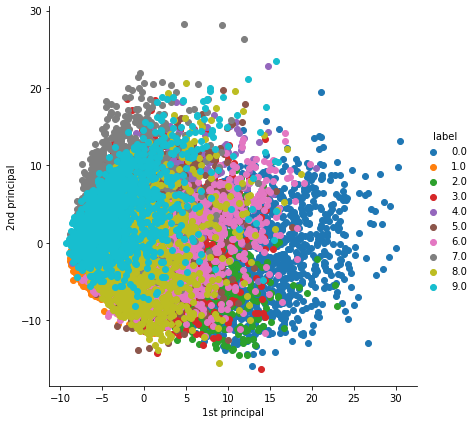

In [17]:
#2D Plot-using first few numbers,0-9
#part of dimensionality reduction

import seaborn as sns

pca_df=pd.DataFrame(data=pca_data,columns=("1st principal",
                                          "2nd principal","label"))
sns.FacetGrid(pca_df,hue="label",size=6).map(plt.scatter,"1st principal",
                                            "2nd principal").add_legend()
plt.show()

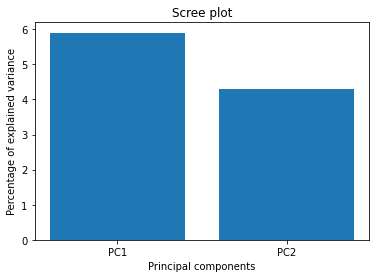

In [18]:
#scree plot

per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
#calculate the % variance with respect to each principal component and giving labels to plot the graph

#creating labels for Principal components PC1,PC2
labels=['PC'+str(x)for x in range(1,len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Principal components')
plt.title('Scree plot')
plt.show()

#PC1 has more variance

In [19]:
pca.n_components=784
pca_data=pca.fit_transform(sample_data)

percentage_var_explained=pca.explained_variance_/np.sum(pca.explained_variance_);
cum_var_explained=np.cumsum(percentage_var_explained)#cumulative variance

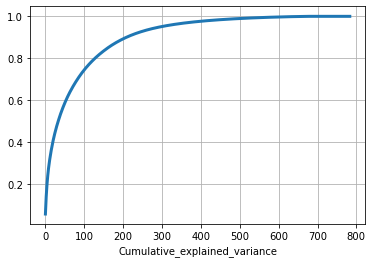

In [20]:
#Plotting a PCA Spectrum

plt.figure(1,figsize=(6,4))
plt.clf()
plt.plot(cum_var_explained,linewidth=3)
plt.axis('tight')
plt.grid()
plt.xlabel('Cumulative_explained_variance')
plt.show()

#initially our dimension was 42kx784(mnist overall data)
#here we can see that,when we take first 200 components, getting 90% of overall data.
#Ater that range if data, graph became  same ,no variance.
#So we can omit remaining part.

In [ ]:
#0-200 range is selected, impacted, then rest of data are constantly same.so...